# day 301

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# Tenet: DERIVATIVES make Hard problems Easier!!!!!!!!!


## Things that become easier with derivatives are:
1. solving equations become easier with derivatives.
2. sketching functions become easier with derivatives.
3. approximating the functions become easier with derivatives.
4. optimization becomes easier with derivatives.

# Racing functions to Infinity and beyond.
---------------

## A test to see which grows faster than which (numerator or denominator):
![sfsdfs](Images/310124_calc.png)

## notes:
* when you are in indeterminate form (0/0) or (infinity/infinity) apply l'hopitals rule.
* take derivative of the numerator and denominator of the functions.
* as long as you are in indeterminate form keep on taking derivative 
* if the denominator dissolves to a constant then you are assured that numerator grows faster than the denominator.
* if the numerator dissolves to a constant then you are assured that the denominator grows faster than the numerator.
* if both of them disolve to a constant number then they both balance out which means their growth rate is similar to each other's.

## An example to illustrate:
![sfsdfs](Images/310124_calc1.png)

## notes:
* here the numerator grows by 1.25 times more than the denominator.

![sfsdfs](Images/310124_calc2.png)

## notes:
* here the numerator's growth is constant but the growth of the denominator plummets with every epoch of taking another derivative. so the numerator always grows faster than the denominator.

![sfsdfs](Images/310124_calc3.png)

## notes:
* here the numerator's growth is constant but the growth of the denominator plummets with every epoch of taking another derivative.so the numerator always grows faster than the denominator.

![sfsdfs](Images/310124_calc4.png)

## notes:
* here the denominator grows faster than the numerator. because the e^{negative number} would get closer and closer to 0.

# day 302

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# Second derivative test: to find out whether we are at local minima or local maxima.

![fsdfs](Images/010224_calc.png)

## notes:
* the critical points are when the derivative of the function (the tangent line) is 0 or undefined.

## condition and implications of second derivative test:
![fsdfs](Images/010224_calc1.png)

## doing the second derivative test:
![fsfsdfs](Images/010224_calc2.png)
![fsdfs](Images/010224_calc3.png)

## notes:
* we find the critical points when the first derivative of the function(x) is zero, when df/dx (x) is zero.
* and then input the critical point to the second derivative of the equation, if the second derivative of the function with that particular value of concern is: 
* if the answer is < 0 then we are at local maxima.
* if the answer is > 0 then we are at local minima.
* if the answer is 0   then we are at an inconclusive stage.

## graphical intuition about the second derivative's ability to find the function's maxima and minima:

![sfsdfs](Images/010224_calc4.png)
## notes:
* notice that when the second derivative (orange line) and the critical point meet that's when you get the local minima and local maxima.
* please trace the blue line, green line, orange line and critical points on the chart to understand how they all interact to predict the local minima and local maxima.

## no critical points:
![fsdfs](Images/010224_calc5.png)

## notes:
* the function has no critical points because 2pi is not negative, if it was negative we could have taken it to the right and solved for x. in other words 2pi is always larger than sin(pi X x). 2pi shifts the sin(pi X x) so to speak.
* also notice the derivative plot it never crosses zero which we need it to to solve for x and find critical points.
* so if finding the critical points by looking at a function seems tedious then plot the function to get the intuitive feel for it.

# day 302,day 303

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# exercise1: compute and plot the derivative of the function

# $$ f(x) = x^4 - 8x^2 $$

## goals:
* write a function that takes a function and find its first and second derivative and returns the lambdified version of function, first_derivative and second derivative
* plot the function,first derivative and second derivative lines.
* plot the critical points
* plot the points on the second derivative too.

In [37]:
def transformed_f(f:'a function') -> 'returns numpy_versioned functions':
    """
    Args: 
    f: it is a function in sympy form.
    
    objective:
    returns 
    1. function_lambdified
    2. first derivative lambdified.
    3. second derivative lambdified.
    4. critical points (df/dx=0)
    
    # how to use the result?
    please use some numbers such as in this fashion: your_function(xx),first_der(xx),second_der(xx)
    where xx is an array of real numbers.
    """
    
    first_derivative = sym.diff(f,x)
    second_derivative = sym.diff(first_derivative,x)
    f_lambdified = sym.lambdify(x,f,'numpy')
    
    first_derivative_lambdified = sym.lambdify(x,first_derivative,'numpy')
    second_derivative_lambdified = sym.lambdify(x,second_derivative,'numpy')
    
    critical_points = sym.solve(sym.Eq(first_derivative,0))
    
                                               
    # returns the function,first_derivative, and second_derivative in lambdified form
    return f_lambdified,first_derivative_lambdified,second_derivative_lambdified, np.array(critical_points)
       

In [38]:
help(transformed_f)

Help on function transformed_f in module __main__:

transformed_f(f: 'a function') -> 'returns numpy_versioned functions'
    Args: 
    f: it is a function in sympy form.
    
    objective:
    returns 
    1. function_lambdified
    2. first derivative lambdified.
    3. second derivative lambdified.
    4. critical points (df/dx=0)
    
    # how to use the result?
    please use some numbers such as in this fashion: your_function(xx),first_der(xx),second_der(xx)
    where xx is an array of real numbers.



In [60]:
def MakePlot(f:'function',xx:'an array of real numbers',transform:'transformation function'=transformed_f) -> 'returns a lot of plots':
    
    """
    The objective:
    0. finds the local minimum or maximum on critical points using second derivative.
    1. it plots the function.
    2. it plots the first_derivative of the function.
    3. it plots the second derivative of the function.
    4. it plots the critical points and their corresponding values on the function,first derivative and second derivative.
    
    """

    f_lambdified,first_der,second_der,critical_points = transformed_f(f)
    
    # critical_points check:
    if len(critical_points) == 0:
        print("No critical points found! so, Aborting")
        return 
    try:
        second_der(critical_points)
    except (AttributeError, TypeError):
        print("No critical points found! so, Aborting")
        return 
        
    
    # finding local minimum and local maximum based on critical points and second derivative
    for i,value in enumerate(second_der(critical_points)):
        if value < 0:
            display(Math('\\frac{d^2f}{dx^2}(%s) < 0, \\text{ so it is a local maximum }'%(critical_points[i])))
        elif value > 0:
            display(Math('\\frac{d^2f}{dx^2}(%s) > 0, \\text{ so it is a local minimum }'%(critical_points[i])))
        elif value == 0:
            display(Math('\\frac{d^2f}{dx^2}(%s) = 0, \\text{ so it is inconclusive }'%(critical_points[i])))


    # plot the function,first_derivative and second_derivative
    plt.figure(dpi=150)
    plt.plot(xx,f_lambdified(xx),label='f')
    plt.plot(xx,first_der(xx),label="$ \\frac{df}{dx}$")
    plt.plot(xx,second_der(xx),label="$\\frac{d^2f}{dx^2}$")
    plt.plot(critical_points,f_lambdified(critical_points),'ro',label='critical_points')
    plt.plot(critical_points,first_der(critical_points),'bX',alpha=0.3,label='$ \\frac{df}{dx} = 0 $')
    plt.plot(critical_points,second_der(critical_points),'bD',alpha=0.3,label='$ \\frac{d^2f}{dx^2} = 0 $')


    # decoration
    plt.xlim([-3,3])
    plt.ylim([-50,50])

    plt.legend(loc=(1.1,0.5))


In [31]:
help(MakePlot)

Help on function MakePlot in module __main__:

MakePlot(f: 'function', xx: 'an array of real numbers', transform: 'transformation function' = <function transformed_f at 0x0000020838A98820>) -> 'returns a lot of plots'
    The objective:
    0. finds the local minimum or maximum on critical points using second derivative.
    1. it plots the function.
    2. it plots the first_derivative of the function.
    3. it plots the second derivative of the function.
    4. it plots the critical points and their corresponding values on the function,first derivative and second derivative.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

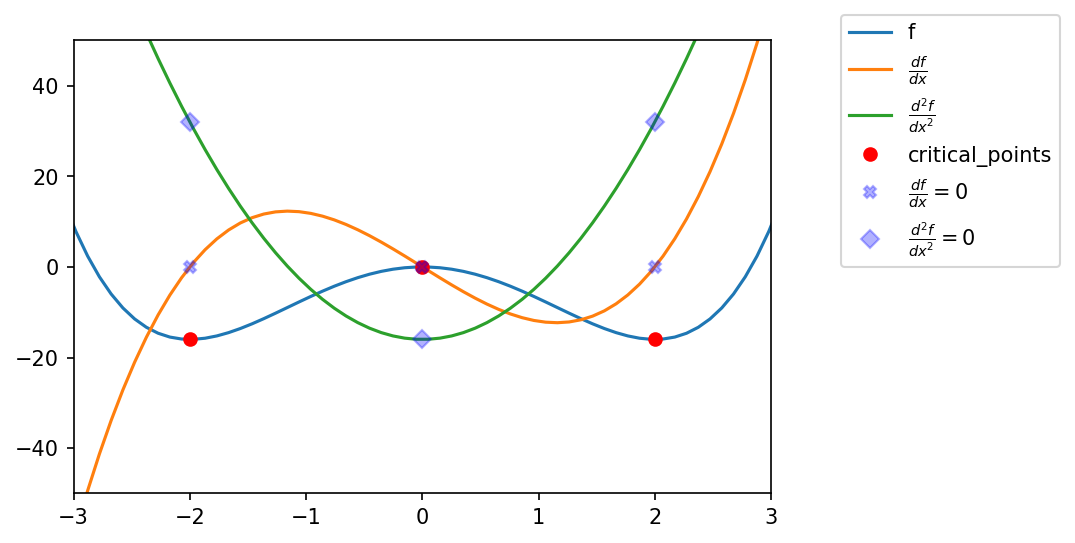

In [40]:
# creation of functions
x = sym.symbols('x')
f = x**4 - 8*x**2
xx = np.linspace(-5,5,100)

MakePlot(f,xx,transform=transformed_f)
plt.show()

![fsfsf](Images/030224_calc.png)

<IPython.core.display.Math object>

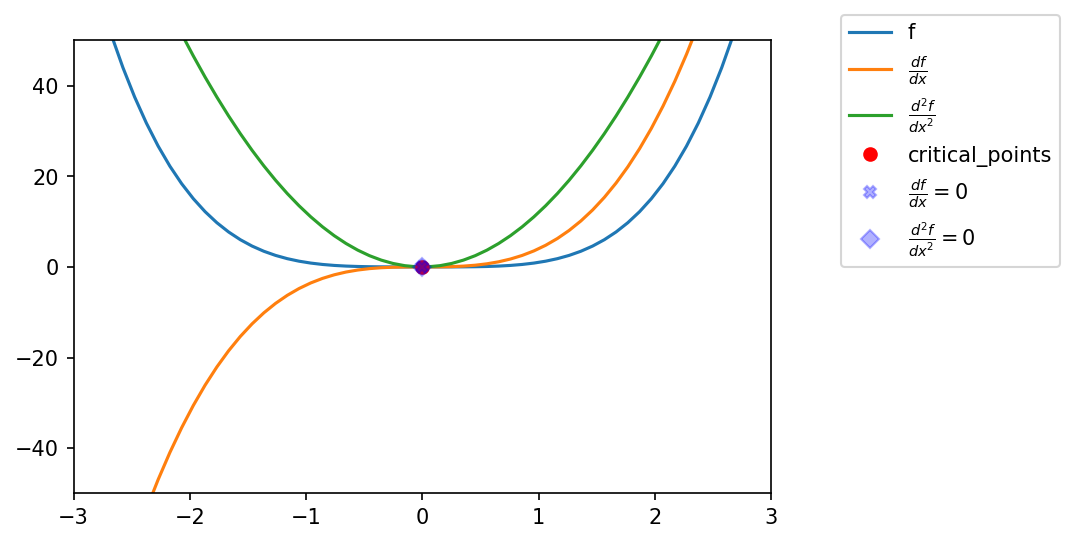

In [41]:
# 1
x = sym.symbols('x')
f = x**4
xx = np.linspace(-5,5,100)
MakePlot(f,xx,transform=transformed_f)

<IPython.core.display.Math object>

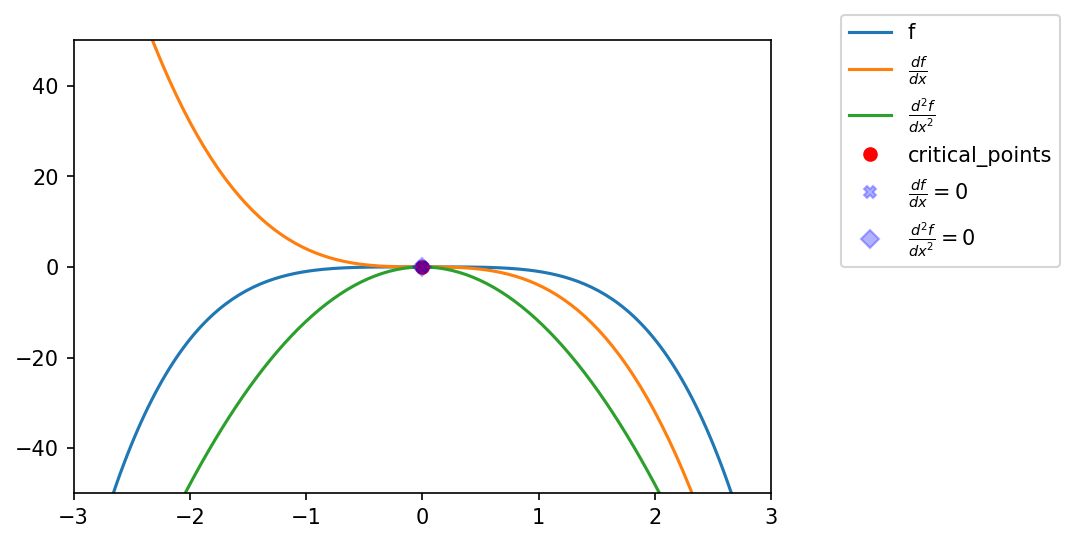

In [62]:
# 2
x = sym.symbols('x')
f = -x**4
xx = np.linspace(-15,15,1000)
MakePlot(f,xx,transform=transformed_f)


<IPython.core.display.Math object>

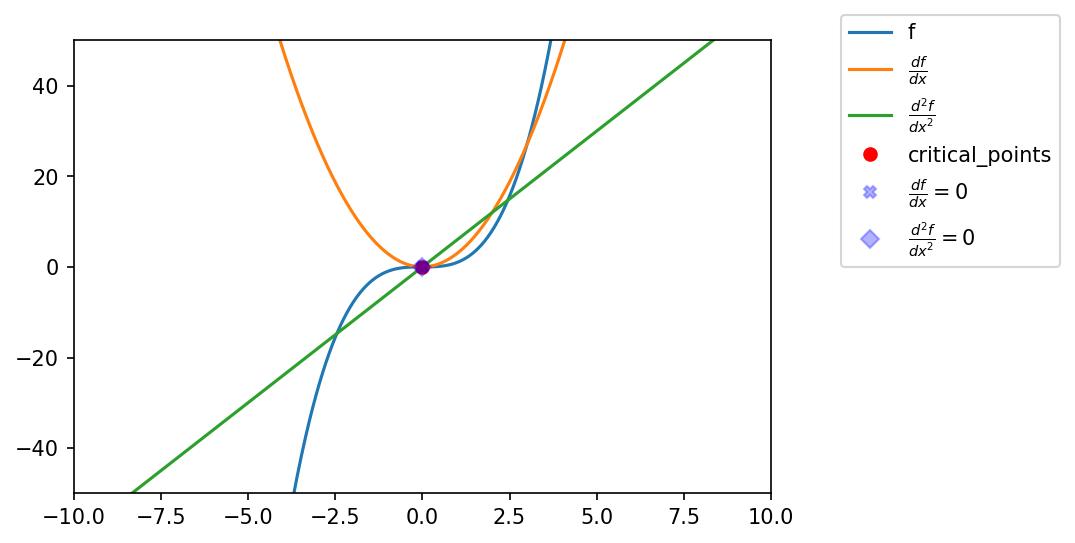

In [51]:
# 3
x = sym.symbols('x')
f = x**3
xx = np.linspace(-15,15,1000)
MakePlot(f,xx,transform=transformed_f)
plt.xlim([-10,10]);

In [64]:
# 4
x = sym.symbols('x')
f = 2*sym.pi*x + sym.sin(sym.pi*x)
xx = np.linspace(-15,15,1000)
MakePlot(f,xx,transform=transformed_f)
# plt.xlim([-10,10]);

No critical points found! so, Aborting


# exploration,analysis and freethrows

In [54]:
x = sym.symbols('x')
f = 2*sym.pi*x + sym.sin(sym.pi*x)
xx = np.linspace(-15,15,1000)
func,first_der,second_der,critical_points = transformed_f(f)
critical_points

array([acos(-2)/pi, 2 - acos(-2)/pi], dtype=object)

In [55]:
for value in critical_points:
    print(value)

acos(-2)/pi
2 - acos(-2)/pi


# day 304, 311,312

# Linear Approximations on any function

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

![sfsdfs](Images/050224_calc.png)
![sfsdfs](Images/050224_calc1.png)
![sfsdf](Images/050224_calc2.png)
![sfsdfs](Images/050224_calc3.png)
![sfsdfs](Images/050224_calc4.png)
![sfsdfs](Images/050224_calc5.png)
![sfsdfs](Images/050224_calc6.png)
![sfsdfs](Images/050224_calc7.png)

### notes:
* Linear approximation miserably failed in the case of example 2 as it predicts a straight flat line but the real function is curvy and slopes downwards and upwards.


### smaller tangent lines means more precision in approximation:
![sfsdfs](Images/050224_calc8.png)


### how close do x0 and a  need to be for precise computation of predictions?
![sfsdfs](Images/050224_calc9.png)

# code challenge:
![sfsfs](Images/160224_calc.png)

In [2]:
x = sym.symbols('x')

fx = sym.sqrt(x) + 2*x

fx

In [3]:
diff = sym.diff(fx)
diff

In [4]:
a = 4
x0 = 4.37
fx0 = diff.subs({'x':a}) *(x0-a) + fx.subs({'x':a})
fx0

In [5]:
print('The actual value of fx at {} is {}'.format(x0,fx.subs(x,x0)))
print('The Linear approximation value of fx at {} is {}'.format(x0,fx0))

The actual value of fx at 4.37 is 10.8304544960367
The Linear approximation value of fx at 4.37 is 10.8325000000000


In [6]:
# conclusion: out linear approximation seems to pretty close to the actual value, isn't it?

In [23]:
# functionising the whole thing
def LinearApproximation(fx,diff,x0,a):
    """
    # args:
    * fx: is the function of your choice
    * diff: differentiation of function fx.
    * x0: is the target point(you approximate the function to be at using a linear line)
    * a: is the point on the function
    
    # description: 
    * fx0 = f'(a)(x0-a) + f(a)
    * y = mx + c
    * This function finds and returns the Linear Approximation of a function given a point on the function and a desired 
    point on space.
    
    """
    fx0 = diff.subs(x,a) *(x0-a) + fx.subs(x,a)
    return fx0

In [41]:
help(LinearApproximation)

Help on function LinearApproximation in module __main__:

LinearApproximation(fx: 'function', x0: 'the point you want to get to', a: 'the point on the function')
    # args:
    * fx: is the function of your choice
    * x0: is the target point(you approximate the function to be at using a linear line)
    * a: is the point on the function
    
    # description: 
    * fx0 = f'(a)(x0-a) + f(a)
    * y = mx + c
    * This function finds and returns the Linear Approximation of a function given a point on the function and a desired 
    point on space.



# code challenge 2: 

![sdfsdf](Images/160224_calc1.png)

x0 = is the average of all values of a.

In [9]:
a = np.arange(5,15,1)
x0 = np.mean(a)
a,x0

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 9.5)

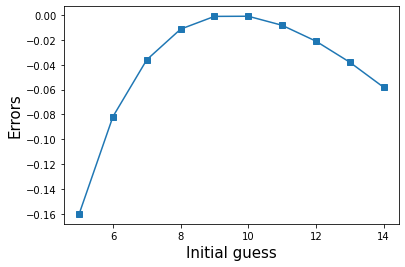

In [17]:
x = sym.symbols('x')
fx = sym.sqrt(x) + 2*x
diff = sym.diff(fx,x)

errors = np.zeros(len(a))
prediction = np.zeros(len(a))
actual = fx.subs(x,x0)

for i,ai in enumerate(a):
    prediction[i] = LinearApproximation(fx,diff,x0,ai)
    errors[i] = actual - prediction[i]
    
    
# plot the error and guesses(fx0_array)
plt.plot(a,errors,'s-')
plt.xlabel('Initial guess',fontsize=15)
plt.ylabel('Errors',fontsize=15)
plt.show()

## exploration, analysis and freethrows

In [11]:
fx.subs(x,x0)

In [13]:
prediction

array([22.24229857, 22.16392425, 22.1182069 , 22.09359217, 22.08333333,
       22.08322072, 22.09049128, 22.1032577 , 22.1201886 , 22.14031959])

In [18]:
index = np.argmin(np.abs(actual-prediction))
index

5

In [19]:
errors[index]

In [20]:
prediction[index]

In [21]:
actual

# code challenge:
![sfsf](Images/170224_calc1.png)

In [24]:
x = sym.symbols('x',real=True) # to ignore the complex part
fx = sym.Abs(sym.sin(x))
df_dx = sym.diff(fx)


print('The function is: ')
display(fx)

print('The derivative of the function is: ')
display(df_dx)

The function is: 


The derivative of the function is: 


In [44]:
a = np.linspace(-1,1)
x0 = np.mean(a)
a,x0

(array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]),
 -7.105427357601002e-17)

In [45]:
# testing
LinearApproximation(fx,df_dx,x0=0.47,a=0.4734)

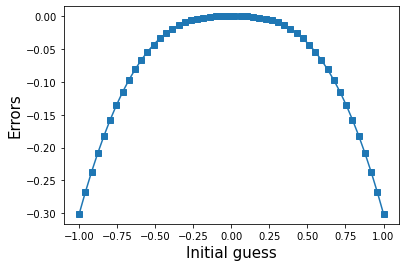

In [46]:
errors = np.zeros(len(a))
prediction = np.zeros(len(a))
actual = fx.subs(x,x0)

for i,ai in enumerate(a):
    prediction[i] = LinearApproximation(fx,diff,x0,ai)
    errors[i] = actual - prediction[i]
    
    
# plot the error and guesses(fx0_array)
plt.plot(a,errors,'s-')
plt.xlabel('Initial guess',fontsize=15)
plt.ylabel('Errors',fontsize=15)
plt.show()

## exploration, analysis and freethrows

In [47]:
actual

In [48]:
target = 0
index = np.argmin(np.abs(errors-target))
index

25

In [49]:
errors[index]

In [50]:
prediction[index]

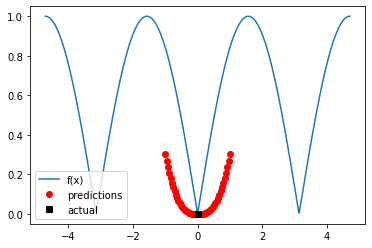

In [58]:
# plotting
numpy_fx = sym.lambdify(x,fx,'numpy')
domain = np.linspace(-1.5*np.pi,1.5*np.pi,1000)

plt.plot(domain,numpy_fx(domain),label='f(x)')
plt.plot(a,prediction,'ro',label='predictions')
plt.plot(x0,actual,'ks',label='actual') # x0 is our approximate guess!

plt.legend()
plt.show()

# day 312,day 314,day 315,day 318

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# Newton's method for finding roots

## what the roots of the functions are?
![ssfs](Images/170224_calc3.png)
![fsssf](Images/170224_calc4.png)

### notes:
* To find the roots of any function:
* equate the function to be equal to zero 
* solve for x

## How to estimate roots using newton's method?
![sdfsdf](Images/170224_calc5.png)
![sdfsdf](Images/170224_calc6.png)
![sdfsdf](Images/170224_calc7.png)

### notes:
* the numerator is about the change in y from a random point on function to zero of function 
* the denominator is about the change in x from x to x_n+1.
* it is just about taking the tangent line or the derivative of the function iteratively starting from x and moving over to x_n+1 at each iteration until we get closer to the ideal point.
* x_n is arbitrarily chosen value, x_n+1 is calculated with successive calculations.

## possible failure scenarios and mitigation strategies:
![fsfsd](Images/190224_calc.png)

In [70]:
# code challenge:
x = sym.symbols('x',real=True) # only with the real value we are concerned with
fx = 2*x**3 - 3
df_dx = sym.diff(fx,x)
xn = 1 # random value(closer this random guess to the actual root value, lesser the number of epochs it would take to find the solution)


xn_next = xn - fx.subs(x,xn)/df_dx.subs(x,xn)
xn_next

In [77]:
actual_root = (3/2)**(1/3)
actual_root

In [75]:
first_iteration = 7/6
first_iteration

In [76]:
second_iteration = (7/6) - fx.subs(x,7/6)/df_dx.subs(x,7/6)
second_iteration

In [78]:
third_iteration = second_iteration - fx.subs(x,second_iteration)/df_dx.subs(x,second_iteration)
third_iteration

In [ ]:
# conclusion: we got pretty close, didn't we?

In [20]:
# lets functionize it
def newton_root_of_function(fx:'function',x0:'initial guess'):
    
    """
    Args:
    fx: a function for which you want to find the root for(you want to solve for, i.e 3x-3=0 solve for x)
    x0: initial guess.
    
    Goal:
    we will find the root of the function iteratively and return the optimal solution that is close to the actual value.

    """
    actual = sym.solve(fx)[0]
    epoch = 10 # number of iterations to find the root
    df_dx = sym.diff(fx,x)
    prediction = np.zeros(epoch) # to capture the prediction values
    
    for i in range(epoch):
        x0 = x0 - (fx.subs(x,x0)/df_dx.subs(x,x0))
        prediction[i] = x0 
        
    # finding the ideal value of prediction
    idx = np.argmin(np.abs(actual-prediction))
    
    return prediction[idx]

In [23]:
x = sym.symbols('x',real=True)
fx = 2*x**3 - 3
x0 = 1

newton_root_of_function(fx,x0)

## 2. solve for the following equation using newton's root method

# $$ fx = 2(x-1)^{3} = 3 , x0 = 1 $$

In [28]:
# 2
fx = 2*(x-1)**3 - 3
x0 = 1

newton_root_of_function(fx,x0)

TypeError: Cannot convert complex to float

In [32]:
# lets choose a different initial value x0 = 3

fx = 2*(x-1)**3 - 3
x0 = 3

newton_root_of_function(fx,x0)

## failure scenarios of newton method to find root of any function(to solve for any function by setting to 0 that is):

![fsfsd](Images/190224_calc.png)

# exercise:

![sfsfsdf](Images/200224_calc.png)

In [3]:
def newton_root(fx,df_dx,x0):
    """
    # Args:
    fx: is function you have to pass in that you want to find root for(solve for)
    df_dx: is the derivative of the function(tangent line)
    x0: initial guess
    
    # Goal: 
    1. plot the prediction against number of epochs
    2. return the ideal solution to the function when the fx = 0
    """
    epochs = 10
    predictions = np.zeros(epochs)
    actual = sym.N(sym.solve(fx,x)[0])
    initial = x0
    
    for i in range(epochs):
        x0 = x0 - (fx.subs(x,x0)/df_dx.subs(x,x0))
        predictions[i] = x0
        
    ## plot it
    plt.figure(dpi=100)
    axes = plt.gca()
    plt.plot(np.arange(1,epochs+1,1),predictions,'s-')
    plt.plot(axes.get_xlim(),[actual,actual],'r--',label='actual root')
    plt.xlabel('Epochs')
    plt.ylabel('predictions')
    plt.xlim(0,epochs)
    plt.legend()
    plt.show()
    
    print("prediction = %s "%(predictions[-1]))
    print("Actual = %s"%(actual))

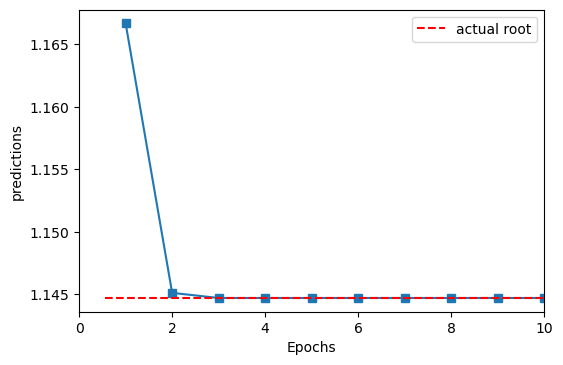

prediction = 1.1447142425533319 
Actual = 1.14471424255333


In [3]:
x = sym.symbols('x',real=True)
fx = 2*x**3-3
df_dx = sym.diff(fx,x)
x0 = 1
newton_root(fx,df_dx,x0)     

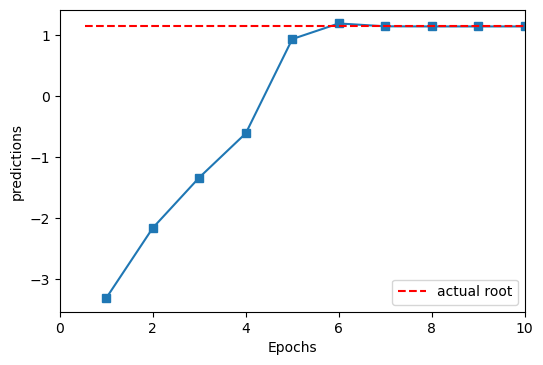

prediction = 1.1447142425533319 
Actual = 1.14471424255333


In [4]:
x = sym.symbols('x',real=True)
fx = 2*x**3-3
df_dx = sym.diff(fx,x)
x0 = -5
newton_root(fx,df_dx,x0)     

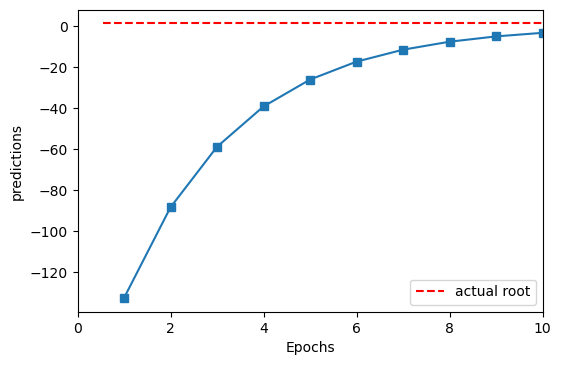

prediction = -3.4243545323375217 
Actual = 1.14471424255333


In [5]:
x = sym.symbols('x',real=True)
fx = 2*x**3-3
df_dx = sym.diff(fx,x)
x0 = -199
newton_root(fx,df_dx,x0)     

![ffsdfsd](Images/230224_calc.png)

In [4]:
x = sym.symbols('x',real=True)
fx = sym.cos(x)-x**2 # solve for fx = 0
df_dx = sym.diff(fx,x)
x0 = 1
newton_root(fx,df_dx,x0)     

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -x**2 + cos(x)

In [8]:
# modify the newton root code since sympy doesn't seem to have a direct solution
def newton_root(fx,df_dx,x0,epochs=3):
    """
    # Args:
    fx: is function you have to pass in that you want to find root for(solve for)
    df_dx: is the derivative of the function(tangent line)
    x0: initial guess
    epochs: number of iterations.
    
    # Goal: 
    1. plot the prediction against number of epochs
    2. return the ideal solution to the function when the fx = 0
    """
    predictions = np.zeros(epochs)
#     actual = sym.N(sym.solve(fx,x)[0]) # we are commenting it out since sympy doesn't have a direct solution
    initial = x0
    
    for i in range(epochs):
        x0 = x0 - (fx.subs(x,x0)/df_dx.subs(x,x0))
        predictions[i] = x0
        
    ## plot it
    plt.figure(dpi=100)
    axes = plt.gca()
    plt.plot(np.arange(1,epochs+1,1),predictions,'s-')
#     plt.plot(axes.get_xlim(),[actual,actual],'r--',label='actual root')
    plt.xlabel('Epochs')
    plt.ylabel('predictions')
    plt.xlim(0,epochs)
    plt.show()
    
    print("prediction = %s "%(predictions[-1]))
#     print("Actual = %s"%(actual))

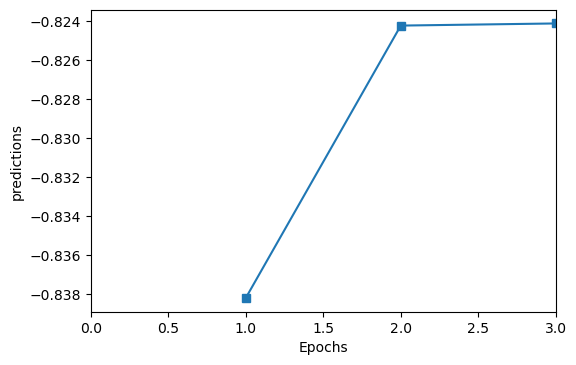

prediction = -0.8241323190509289 


In [21]:
x = sym.symbols('x',real=True)
fx = sym.cos(x)-x**2 # solve for fx = 0
df_dx = sym.diff(fx,x)
x0 = -1
newton_root(fx,df_dx,x0)     

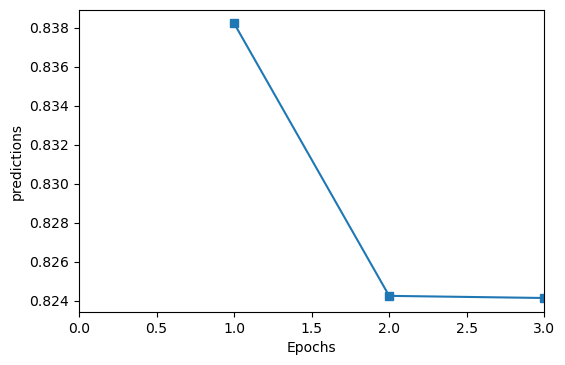

prediction = 0.8241323190509289 


In [23]:
# THERE ARE ACTUALLY 2 SOLUTIONS FOR THIS PARTICULAR EQUAITON BECAUSE OF X^2
x = sym.symbols('x',real=True)
fx = sym.cos(x)-x**2 # solve for fx = 0
df_dx = sym.diff(fx,x)
x0 = 1
newton_root(fx,df_dx,x0)     

# exploration, analysis and freethrows

In [6]:
sym.solve(sym.cos(x)-x**2,x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -x**2 + cos(x)

In [8]:
np.cos(1)

In [9]:
-np.sin(1)

# conclusion:

* `Newton's method helps us find solution for even the functions that are seemingly impossible to solve when using sympy`. FEEL THE POWER OF NEWTON'S APPROXIMATION

# day 317,day 318

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# solving optimization problems

![fsfs](Images/230224_calc1.png)
![fsfs](Images/230224_calc2.png)
![fsssf](Images/230224_calc3.png)
![fsfs](Images/230224_calc4.png)
![fsfs](Images/230224_calc5.png)

## notes:
* to find the critical points (the points at which the function would be maximum or minimum) we need to calculate the derivative of the function of the and set it to 0(df_dx = 0), in other words solve for the derivative of the function to find the cirtical point.


![fsfs](Images/230224_calc6.png)
![fsfs](Images/230224_calc7.png)

## notes:
* we are asked to find out just the dimensions (x,y) not the area of the rectangle.


# making an optimization graph with optimization objective on the y-axis and x and y variables(independent variables) on the x axis:
![fsfs](Images/230224_calc8.png)


# choosing the right answer:
![sfsfs](Images/230224_calc10.png)

when you get to have many solutions choose the right answer that makes sense to that specific problem.

# do we need to use calculus to solve for optimization problem?
![sfsfs](Images/230224_calc11.png)

## notes:
* non-calculus solutions such as grid-search for optimization problems generally do not scale meaning it won't work well with more than 3 variables.
* so yeah calculus based methods such as SGD(stochastic Gradient Descent), ADAM, LION methods are needed for optimizing any problem of bigger scale in nature.


# conclusion:
* Hard part of the optimization problem is setting up the initial equations 
* second hard part of the optimiization problem is knowing what we are trying to optimize for is actually the thing we should optimize for.

In [ ]:
# examples

![fsfsd](Images/260224_calc.png)
![fsfsd](Images/260224_calc1.png)
![fsfsd](Images/260224_calc2.png)
![fsfsd](Images/260224_calc3.png)

# day 321

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

![fsfsf](Images/290224_calc.png)
![fsfsf](Images/290224_calc1.png)
![fsfsf](Images/290224_calc2.png)

In [8]:
x = sym.symbols('x')
fx = 12*x**2 -500*x + 3600
df_dx = sym.diff(area,x)


fx,df_dx

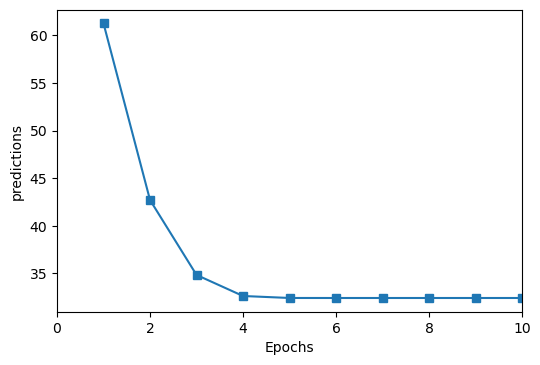

prediction = 32.41036999120817 


In [23]:
# apply newton method
newton_root(fx,df_dx,x0=100,epochs=10)

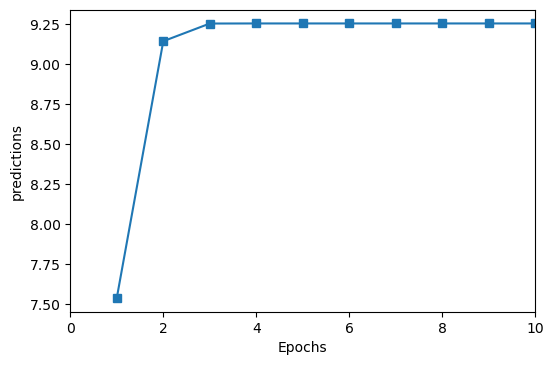

prediction = 9.256296675458497 


In [22]:
#  apply newton method
newton_root(fx,df_dx,x0=1,epochs=10)

![fsfsf](Images/290224_calc3.png)
![fsfsf](Images/290224_calc4.png)
![fsfsf](Images/290224_calc5.png)
![fsfsf](Images/290224_calc6.png)
![fsfsf](Images/290224_calc7.png)

In [24]:
(200)**(1/3)

In [25]:
(400)**(1/3)

# day 324, day 325

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
import matplotlib.pyplot as plt
sym.init_printing()


![sfsfs](Images/050324_calc.png)

In [35]:
# code challenge
l,b,x = sym.symbols('l,b,x')
area = 400 # l*b = 400, l = 400/b
perimeter = 2*l + b + 1/2 * b
eq = perimeter.subs(l,400/b)
print("\n The original equation is: ")
display(eq)

# find the critical points (deq_db = 0)
deq_db = sym.diff(eq,b)

print("\n The derivative of the original equation is: ")
display(deq_db)

# critical points deq_db = 0
breadth = np.round(np.sqrt(800/1.5),3)
length = np.round(400/breadth,3)

print('\n Dimensions of length and breadth are: {} and {}'.format(length,breadth))

# check whether it is maximizing or minimizing
double_derivative = sym.diff(deq_db,b)

print("\n The double Derivative is:")
display(double_derivative)

check = double_derivative.subs(b,breadth) 

if check < 0:
    print("The value(b) leads to local maxima")
elif check > 0:
    print("The value(b) leads to local minima")
    print("\n Hence our optimization objective is satisfied. ")
else:
    print("The value(b) trajectory is inconclusive!!! ")



 The original equation is: 



 The derivative of the original equation is: 



 Dimensions of length and breadth are: 17.321 and 23.094

 The double Derivative is:


The value(b) leads to local minima

 Hence our optimization objective is satisfied. 


In [34]:
check

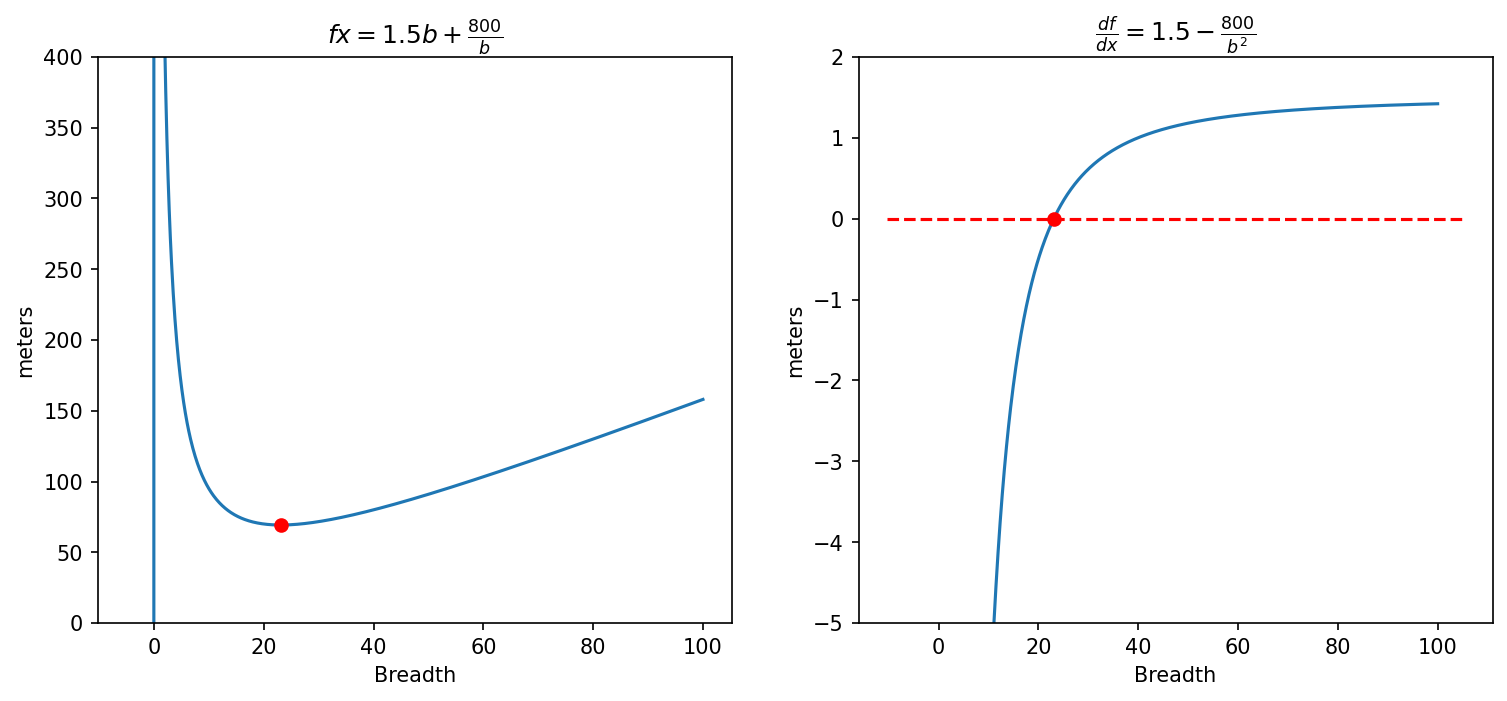

In [70]:
# plotting the function and its derivative
xx = np.linspace(-5,100,1000)
fx = sym.lambdify(b,eq,'numpy')
dfx_dx = sym.lambdify(b,deq_db,'numpy')


# plotting 
fig,ax = plt.subplots(1,2,figsize=(12,5),dpi=150)

ax[0].plot(xx,fx(xx)) # plot the function
ax[0].plot(breadth,fx(breadth),'ro') # plot the point of ideal breadth on the plot
ax[0].set_ylim(0,400)
ax[0].set_xlabel('Breadth')
ax[0].set_ylabel('meters')
ax[0].set_title('$ fx = %s $'%(sym.latex(eq)))



ax[1].plot(xx,dfx_dx(xx))
ax[1].plot(breadth,dfx_dx(breadth),'ro') 
ax[1].set_ylim(-5,2)
ax[1].set_xlabel('Breadth')
ax[1].set_ylabel('meters')
axes = plt.gca()
ax[1].plot(axes.get_xlim(),[0,0],'r--')
ax[1].set_title('$ \\frac{df}{dx} = %s $'%(sym.latex(deq_db)))

plt.show()

In [72]:
# confirm that the calculated length and breadth do not exceed the constraint area(400m^2)

calc_area = length * breadth
actual_area = 400

print("Calculated Area: {}".format(calc_area)) # the slight variation is due to rounding error.
print("perimeter of Farm for Fred: {}".format(2*length + 3/2*breadth))

Calculated Area: 400.01117400000004
perimeter of Farm for Fred: 69.28300000000002


![fsdfsd](Images/060324_calc.png)


In [38]:
l,b,h = sym.symbols('l,b,h')
volume = 200 # l*b*h
total_faces = 4*l*h + l*l # 5 faces with one open face and l = b

# h = 200/l^2
fl = 4*l*200/l**2 + l*l

# find the critical points (solve for h when dfl/dh = 0
h = sym.N(sym.solve(sym.diff(fl,l))[0])

# find the value for l
l = sym.N(sym.sqrt(200/h))

# display the result
print(" Length: {:.3f} \n Height: {:.3f} \n size of bottom: {:.3f} cm^2 \n size of all 4 sides: {:.3f} cm^2 ".\
      format(l,h,l**2,4*l*h))


 Length: 5.210 
 Height: 7.368 
 size of bottom: 27.144 cm^2 
 size of all 4 sides: 153.551 cm^2 


# day 325,day 329,day 331

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# GRADIENT DESCENT:

* The most important optimization algorithm in deep learning

![sfsfs](Images\060324_calc1.png)

## similarity between newton's root and gradient descent:
* Both are iterative optimization algorithms.
![sfsfs](Images\060324_calc3.png)

## A brief visualization into the mechanism of gradient descent in 2D: 
![sfsfs](Images\060324_calc2.png)
![fsfss](Images\110324_calc1.png)
![fsfss](Images\110324_calc2.png)

## notes:
* alpha is the learning rate

## notes:
* the actual minimum of the function is at 0.5 but the gradient descent algorithm found it to be at 0.49...... what explains that? it is because of the iterative nature of the algorithm that gets only closer and closer to the ideal point but never actually reaches it.


# few caveats and benefits of gradient descent algorithm:
![fsfss](Images\110324_calc4.png)
* gradient descent is not only prone to being away (even ever so slightly) from the ideal global minimum but also it has the tendency to get trapped in a local minimum only to never get back out to reach the global minimum depending on the strength of the learning rate. vanishing gradient(the tendency of the learning rate to become smaller and smaller with every iteration that will also dampen the prospect of gradient descent to ever coming back out of a local minimum in search of the global minimum which is its inherent goal to find.
* so the best thing to do whenever possible, which is not always possible though, is set the derivative of the function to be equal to zero and find its critical point that way you will have found that shiny global minimum.
* **where gradient descent algorithm rocks is when we cannot find the critical point by setting the derivative to zero to find the global minimum. Gradient algorithm will approximate it.**


# code challenge

![fsfss](Images\110324_calc5.png)

The function is: 


The df_dx is: 


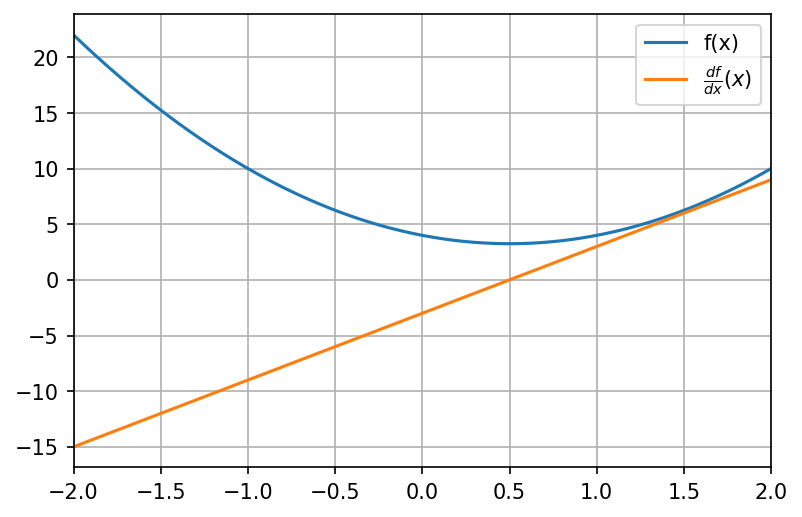

In [102]:
x = sym.symbols('x')
f = 3*x**2 - 3*x + 4
df_dx = sym.diff(f,x)
print("The function is: ")
display(f)
print("The df_dx is: ")
display(df_dx)

# plotting 
plt.figure(dpi=150)
xx = np.linspace(-2,2,1000)
lambdified_f = sym.lambdify(x,f,'numpy')
lambdified_df_dx = sym.lambdify(x,df_dx,'numpy')
plt.plot(xx,lambdified_f(xx),label='f(x)')
plt.plot(xx,lambdified_df_dx(xx),label='$\\frac{df}{dx}(x)$')

plt.xlim(xx[[0,-1]])
plt.grid()
plt.legend()
plt.show()

# exercise 2: 
![fsfss](Images\110324_calc6.png)

iiv is: 2
fiv is : 0.5030823121557854


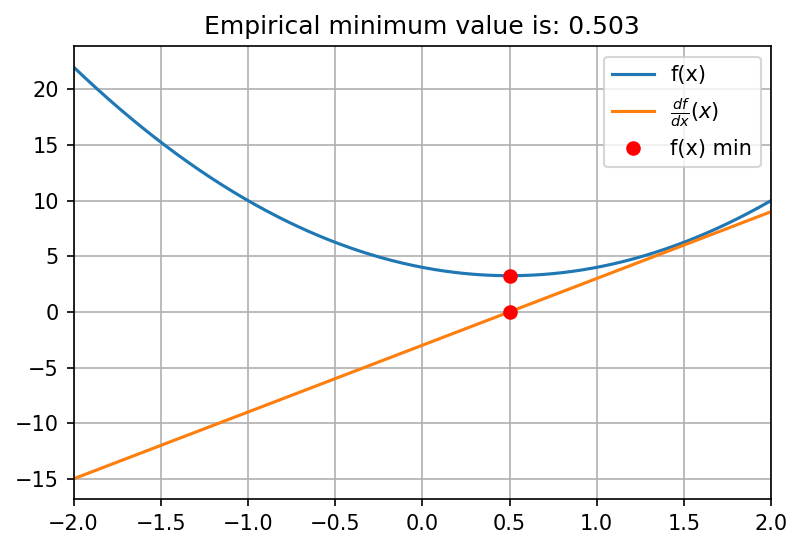

In [103]:
initial_value = np.random.randint(0,9,(1))[0]
epochs = 100
learning_rate = 0.01
print('iiv is: {}'.format(initial_value))

#loop
for epoch in range(epochs):
    d = lambdified_df_dx(initial_value)
    initial_value = initial_value - d*(learning_rate)
    
    
print('fiv is : {}'.format(initial_value))

# plotting 
plt.figure(dpi=150) # giving more pixels or resolution to the image

## plotting the curves
plt.plot(xx,lambdified_f(xx),label='f(x)')
plt.plot(xx,lambdified_df_dx(xx),label='$\\frac{df}{dx}(x)$')

## plotting the points
plt.plot(initial_value,lambdified_f(initial_value),'ro',label='f(x) min')
plt.plot(initial_value,lambdified_df_dx(initial_value),'ro')


plt.title("Empirical minimum value is: {:.3f}".format(initial_value))
plt.xlim(xx[[0,-1]])
plt.grid()
plt.legend()
plt.show()

![sfsfs](Images/140324_calc.png)



initial value is: -0.3463463463463463
final value is : 0.49826086424576804


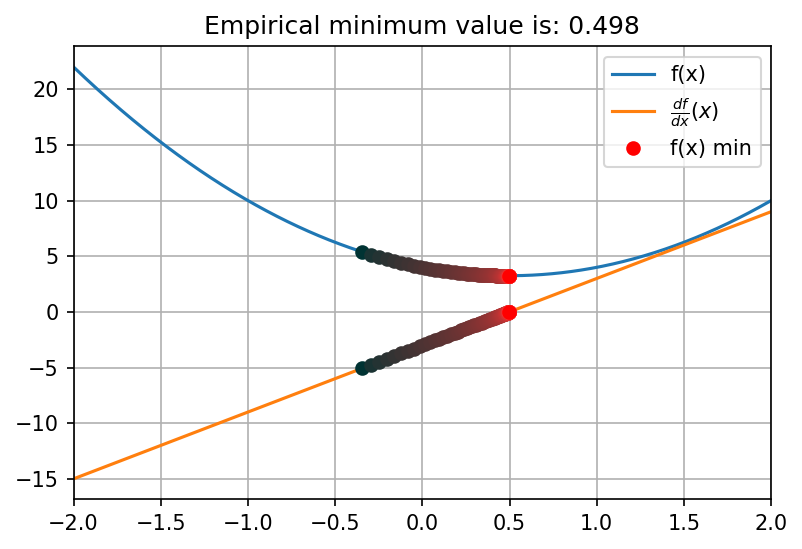

In [108]:
rmp = np.random.choice(xx,1)[0] # rmp stands for random minimum point in xx
epochs = 100
learning_rate = 0.01
print('initial value is: {}'.format(rmp))


# plotting 
plt.figure(dpi=150)
## plotting the curves
plt.plot(xx,lambdified_f(xx),label='f(x)')
# plt.plot(xx[::100],lambdified_f(xx)[::100],'o',color='#962c4d')
plt.plot(xx,lambdified_df_dx(xx),label='$\\frac{df}{dx}(x)$')

#loop
for epoch in range(epochs):
    
    plt.plot(rmp,lambdified_f(rmp),'o',
             color=[(epoch/epochs)**(1/2),.2,.2]) # change the red pixels but keep the green and blue constant
    plt.plot(rmp,lambdified_df_dx(rmp),'o',
             color=[(epoch/epochs)**(1/2),.2,.2])
        
    # calculating the gradient
    d = lambdified_df_dx(rmp)
    rmp = rmp - d*(learning_rate)
    
fv =  rmp   
print('final value is : {}'.format(fv))

## plotting the points
plt.plot(fv,lambdified_f(fv),'ro',label='f(x) min')
plt.plot(fv,lambdified_df_dx(fv),'ro')


plt.title("Empirical minimum value is: {:.3f}".format(fv))
plt.xlim(xx[[0,-1]])
plt.grid()
plt.legend()
plt.show()

# exploration, analysis and freethrows

# day 338

![sfsfs](Images/230324_calc.png)

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

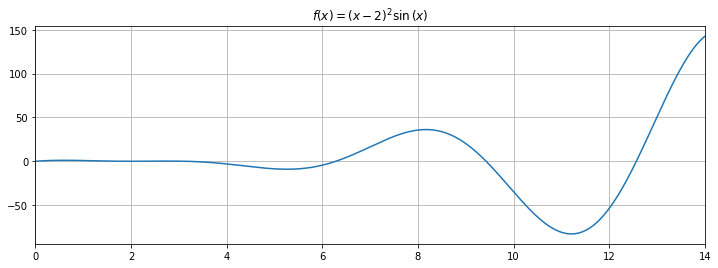

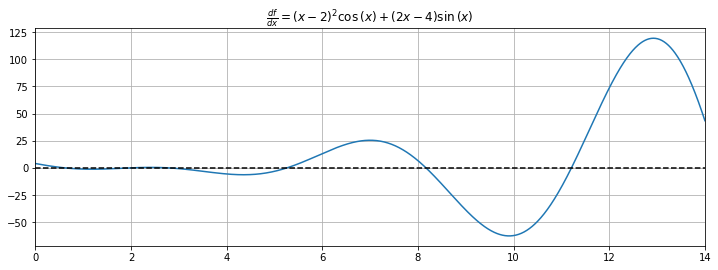

In [21]:
x = sym.symbols('x')
sym_f = sym.sin(x) * (x-2)**2
sym_df_dx = sym.diff(sym_f,x)
xx = np.linspace(0,14,1234)
f = sym.lambdify(x,sym_f,'numpy')
df_dx = sym.lambdify(x,sym_df_dx,'numpy')

# plotting
plt.figure(figsize=(12,4))
plt.plot(xx,f(xx))
plt.title('$f(x) = %s $'%sym.latex(sym_f))
plt.xlim([0,14])
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(xx,df_dx(xx))
plt.plot([xx[0],xx[-1]],[0,0],'k--')
plt.title('$\\frac{df}{dx} = %s $'%sym.latex(sym_df_dx))
plt.xlim([0,14])
plt.grid()
plt.show()

![sfsf](Images/230324_calc1.png)

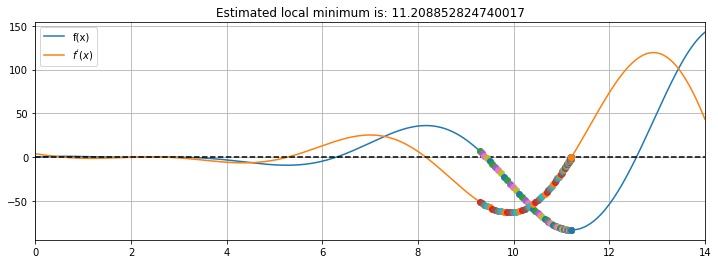

In [101]:
# plotting

# determing the plot size
plt.figure(figsize=(12,4))

# plotting the function
plt.plot(xx,f(xx),label='f(x)')

# plotting the derivative
plt.plot(xx,df_dx(xx),label="$f^{'}(x)$")

# plotting the origin line
plt.plot([xx[0],xx[-1]],[0,0],'k--')


# implementing the gradient descent algo

epochs = 100
learning_rate = 0.001
initial_value = np.random.choice(xx,1)[0]
global_min = initial_value
for epoch in range(epochs):
    
    # plotting the gradient points
    plt.plot(initial_value,f(initial_value),'o')
    plt.plot(initial_value,df_dx(initial_value),'o')
    
    
    initial_value = initial_value - df_dx(initial_value) * learning_rate

    
    
    
plt.title('Estimated local minimum is: %s'%initial_value)
plt.xlim([0,14])
plt.grid()
plt.legend()
plt.show()


# day 445

## Instantaneous rate of change:
* why is it called instantaneous rate of change? change is not constant always. change itself could be changing. so, when we talk about change we also have refer to that instant when the change has occured hence the name instantaneous change.

[Read this notes for better understanding](https://khanacademy.org/math/calculus-1/cs1-applications-of-derivatives/cs1-meaning-of-the-derivative-in-context/a/analyzing-problems-involving-rates-of-change-in-applied-contexts)